In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_bias(qobj,cn=1):
    pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-4,ylog=True,ylab='$C_L^{\kappa\kappa}$')
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    l, ml = (np.loadtxt(qobj.f['TT'].ml[1],usecols=(0,cn))).T
    l, cl = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn))).T
    plot(l,al,label='norm')
    plot(l,n0,label='N0')
    plot(l,ml,label='MF')
    plot(l,cl/99.,label='MF-MC')
    legend()

In [3]:
dirs = local.data_directory()
qobj, Qobj = {}, {}
for wind, ivar, ptsr, ascale in [('com16','base','pt',3.),('com16','noivar','PT',3.),('iso15','V3','PT',3.),('iso15','base','PT',3.),('com15','noivar','PT',1.)]:
    aobj = local.init_analysis_params(qid='comb_dn',ascale=ascale,wind=wind,ivar=ivar,ptsr=ptsr)
    qobj[wind+ivar+ptsr] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wind+ivar+ptsr] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

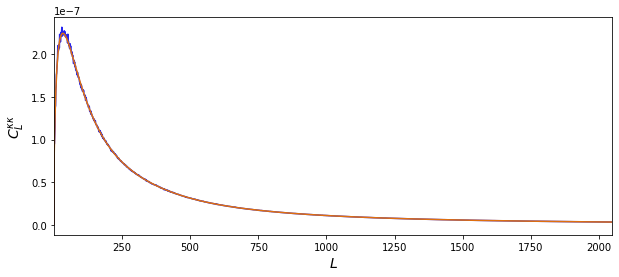

In [4]:
l, xl = (np.loadtxt(qobj['com16noivarPT'].f['TT'].mcls,usecols=(0,4))).T
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ylab='$C_L^{\kappa\kappa}$')
plot(qobj['com16noivarPT'].l,xl)
plot(aobj.l,aobj.ckk)

4.543048244879138
obs A 1.0 mean(A) 1.004 sigma(A) 0.307 S/N 3.252 A>oA 0.88


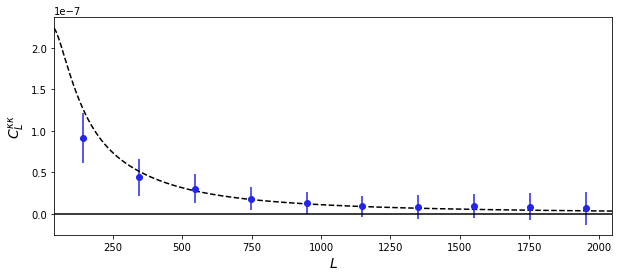

In [5]:
local.plot_spec_kk(Qobj['iso15V3PT'],cn=1,bnum=10)

14.73670303688825
obs A 1.0 mean(A) 1.0 sigma(A) 0.098 S/N 10.221 A>oA 0.96


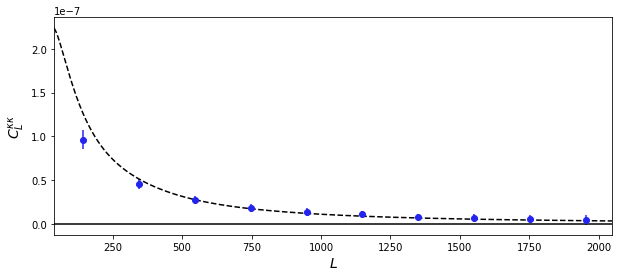

In [6]:
local.plot_spec_kk(Qobj['com15noivarPT'],cn=1,bnum=10)

11.974320004612704
obs A 1.0 mean(A) 1.0 sigma(A) 0.107 S/N 9.305 A>oA 1.0


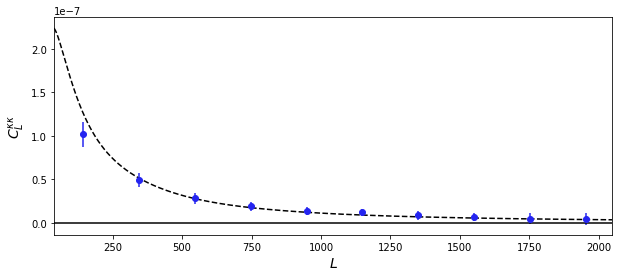

In [7]:
local.plot_spec_kk(Qobj['com16noivarPT'],cn=1,bnum=10)

In [11]:
#local.plot_spec_kk(Qobj['com16noivarPT'],cn=1,bnum=12,rlz=aobj.rlz[:101])

10.826782738583722
obs A 1.0 mean(A) 1.001 sigma(A) 0.119 S/N 8.423 A>oA 0.98


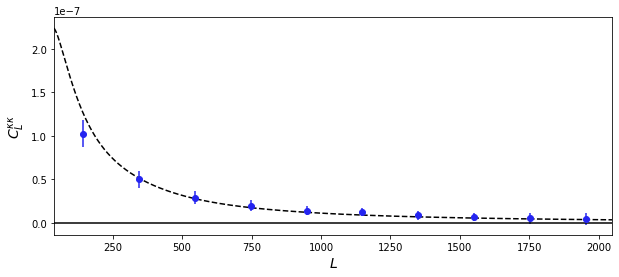

In [14]:
local.plot_spec_kk(qobj['com16noivarPT'],cn=1,bnum=10)

In [15]:
plot(mb.bc,vkk/(mkk+nb)*np.sqrt((mb.bc+.5)*2000./mb.n)*np.sqrt(w['com16noivarPT'][0]))

NameError: name 'mb' is not defined